### Project 1 - CIS 518
Code written by :
Zoh Tia

In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics 
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Read the file
           
filepath = "./netflix_titles.csv"
df = pd.read_csv(filepath)

In [3]:
#Check data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check the size of the dataset
df.shape

(8807, 12)

In [5]:
# Identify and Categorize the features (categorical, numerical).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [7]:
# Check if we have duplicates
df.duplicated().any()

False

In [8]:
# Check missing value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

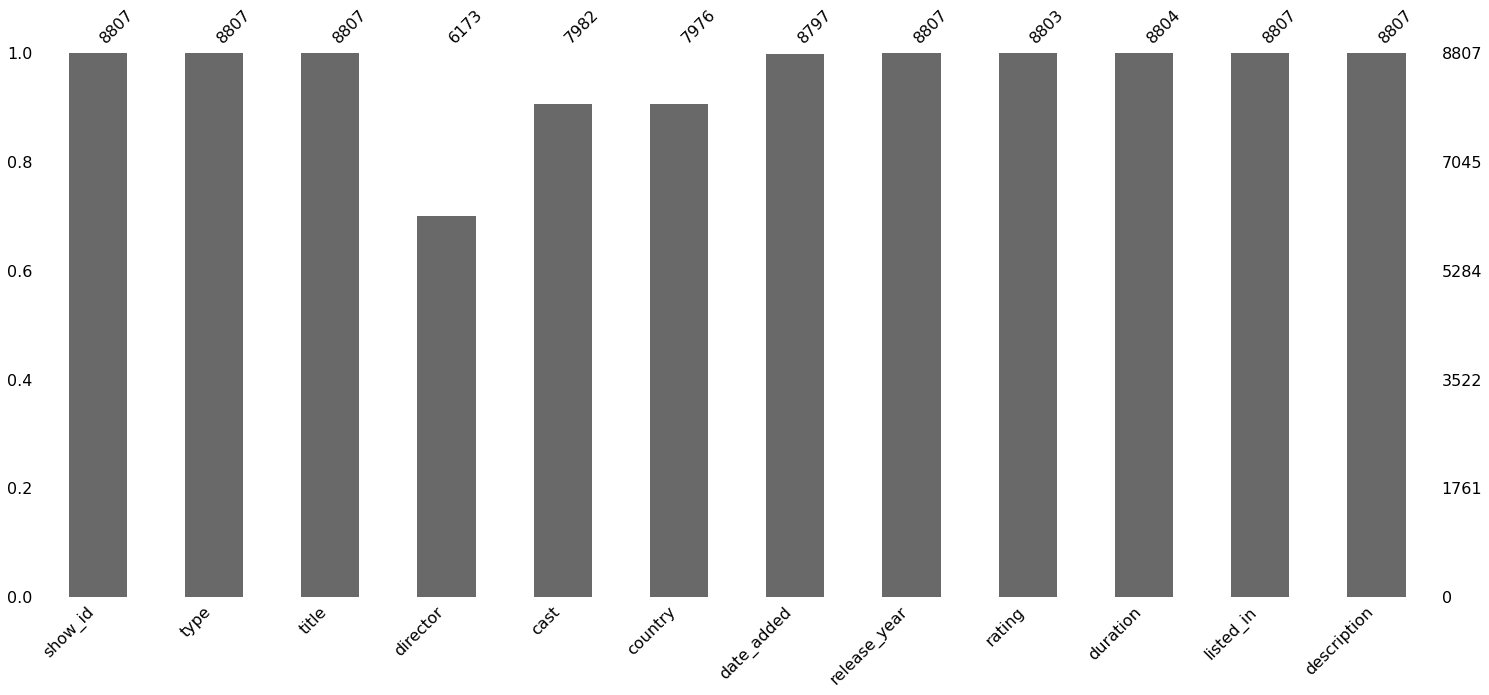

In [9]:
# plot the data for columns with missing numbers (i.e. np.NaN)
msn.bar(df)

### Handling missing values

* Replace the missing value by the mode for date_added,rating and duration
* We want to keep the director, cast and country as it is, we will drop the missing data

In [10]:
# Replacing the nan's value by the Mode

df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [11]:
#Drop the nan's value 

df.dropna(subset=['director'],inplace=True)
df.dropna(subset=['cast'],inplace=True)
df.dropna(subset=['country'],inplace=True)

<AxesSubplot:>

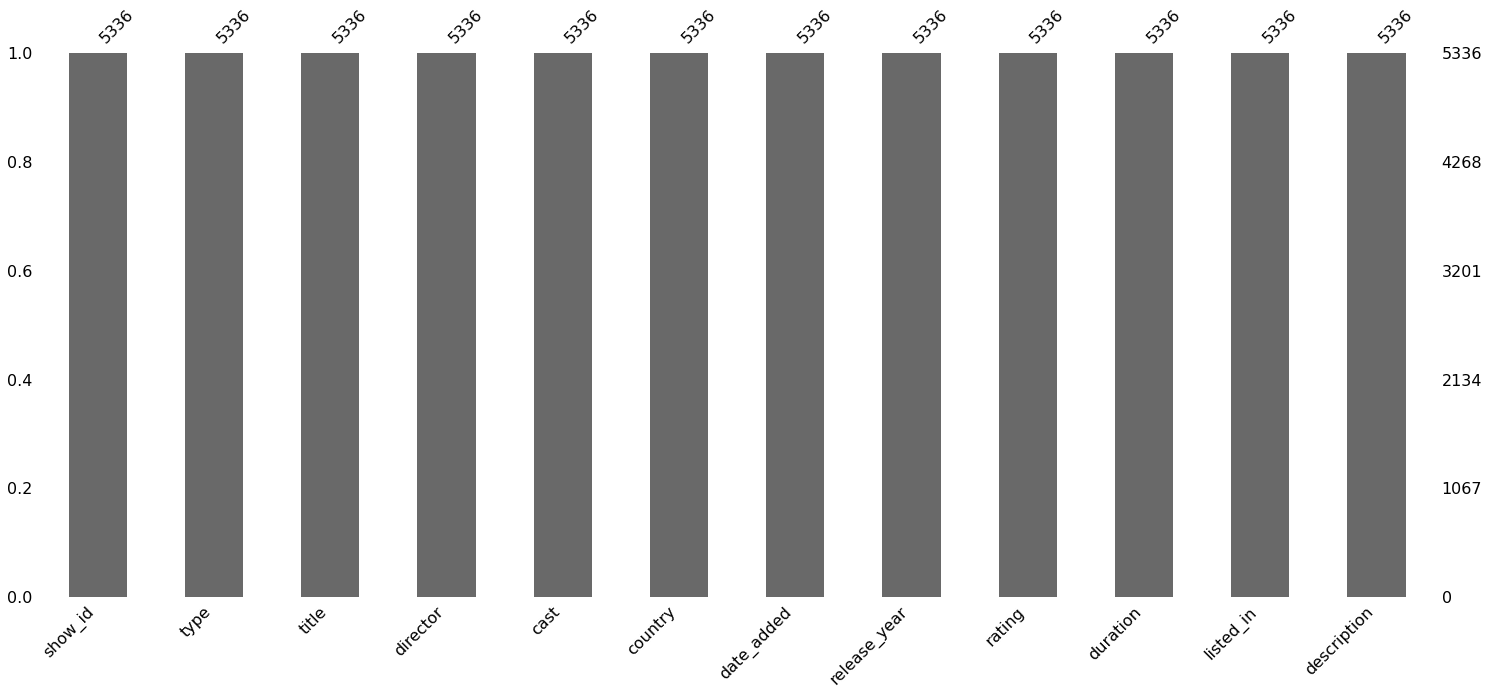

In [12]:
# Re-check missing value
msn.bar(df)

### Cleaning the data

- Adding new columns:
   - genre
   - year_add
   - month_add
   - country_main
   - cast_main
   - minute
- Dropping columns:

  - show_id


In [13]:
#Rename the 'listed_in' column as 'genre'
df.rename({'listed_in':'genre'}, axis = 1,inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [14]:
# Split the genre
df['genre'] = df['genre'].apply(lambda x: x.split(',')[0])
df['genre'].head()

7               Dramas
8     British TV Shows
9             Comedies
12              Dramas
24            Comedies
Name: genre, dtype: object

In [15]:
# Split the date_added to create a new column year_add
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

7     2021
8     2021
9     2021
12    2021
24    2021
Name: year_add, dtype: object

In [16]:
# Split the date_added to create a new column month_add
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

7     September
8     September
9     September
12    September
24    September
Name: month_add, dtype: object

In [17]:
# Split the country to create a new column country_main
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

7      United States
8     United Kingdom
9      United States
12           Germany
24             India
Name: country_main, dtype: object

In [18]:
# Split the cast to create a new column cast_main
df['cast_main'] = df['cast'].apply(lambda x: x.split(",")[0])
df['cast_main'].head()

7         Kofi Ghanaba
8         Mel Giedroyc
9     Melissa McCarthy
12         Luna Wedler
24           Prashanth
Name: cast_main, dtype: object

In [19]:
# Dropping a column
df.drop(['show_id'], axis = 1, inplace = True)

In [20]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_add,month_add,country_main,cast_main
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States,Kofi Ghanaba
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,September,United Kingdom,Mel Giedroyc
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States,Melissa McCarthy
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany,Luna Wedler
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,Comedies,When the father of the man she loves insists t...,2021,September,India,Prashanth


In [21]:
df['type'].value_counts()

Movie      5189
TV Show     147
Name: type, dtype: int64

### Creating two new dataframes
* Movie only
* Tv Show only

In [22]:
df_movie = df[df['type'] =='Movie']
df_tv_show = df[df['type'] == 'TV Show']

In [23]:
df_movie.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_add,month_add,country_main,cast_main
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States,Kofi Ghanaba
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States,Melissa McCarthy
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany,Luna Wedler
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,Comedies,When the father of the man she loves insists t...,2021,September,India,Prashanth
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,September,United States,Adam Sandler


In [24]:
df_tv_show.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_add,month_add,country_main,cast_main
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,September,United Kingdom,Mel Giedroyc
198,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,Crime TV Shows,Alhaja Eniola Salami starts anew and sets her ...,2021,August,Nigeria,Sola Sobowale
273,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,Crime TV Shows,"Ten years after losing two loved ones, a man i...",2021,August,France,Finnegan Oldfield
276,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,International TV Shows,A writer in creative and marital crises finds ...,2021,August,Spain,Diana Gómez
297,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions...",2021,August,India,Suriya


### Exploratory Data Analysis

<AxesSubplot:title={'center':'Movie & TV Show distribution'}, xlabel='type', ylabel='count'>

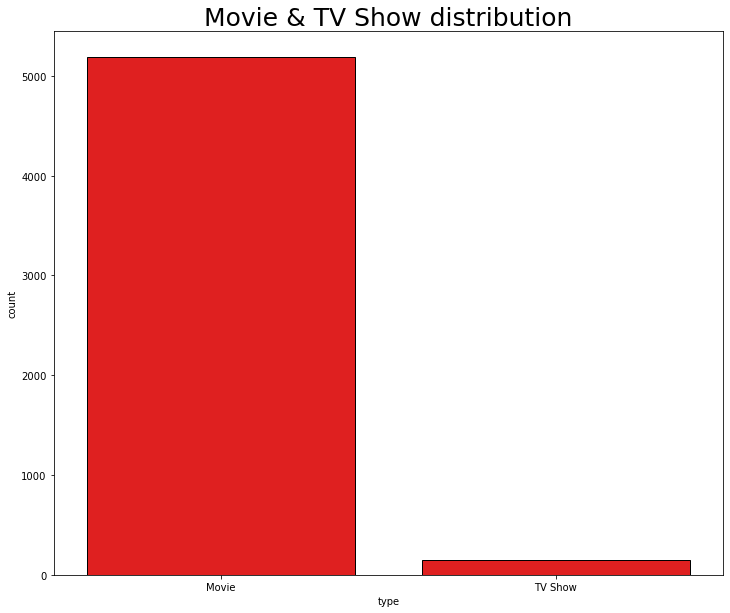

In [25]:
# Plotting Movies vs TV Shows
plt.figure(figsize=(12,10))
plt.title('Movie & TV Show distribution',fontsize=25)
sns.countplot(x='type',data=df, edgecolor='black', color='red')

#### Insight
Netflix released more Movie than TV Show.

<AxesSubplot:title={'center':'Movie Rating distribution'}, xlabel='rating', ylabel='count'>

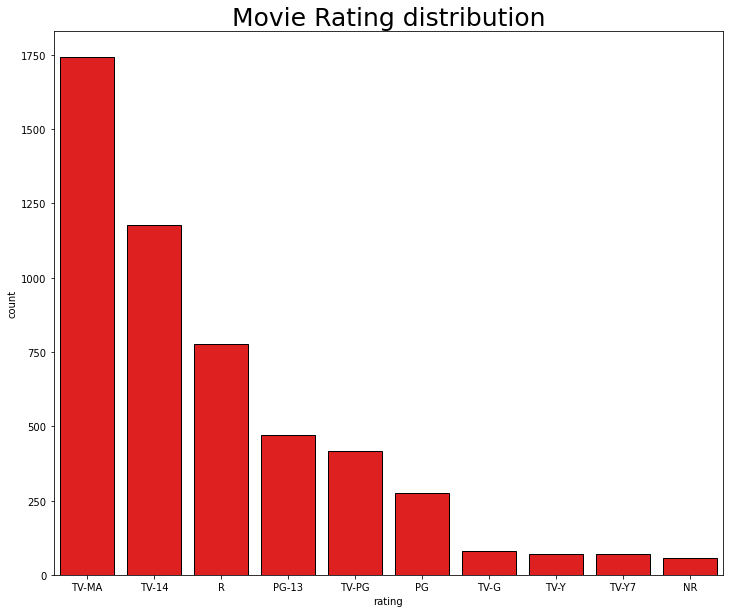

In [26]:
# Ploting Movie rating
plt.figure(figsize=(12,10))
plt.title('Movie Rating distribution',fontsize=25)
sns.countplot(x='rating',data=df_movie, edgecolor='black', color='red', order = df_movie['rating'].value_counts().index[0:10])

#### Insight

There is more TV-MA rating in the Movie dataset.

<AxesSubplot:title={'center':'TV Show Rating distribution'}, xlabel='rating', ylabel='count'>

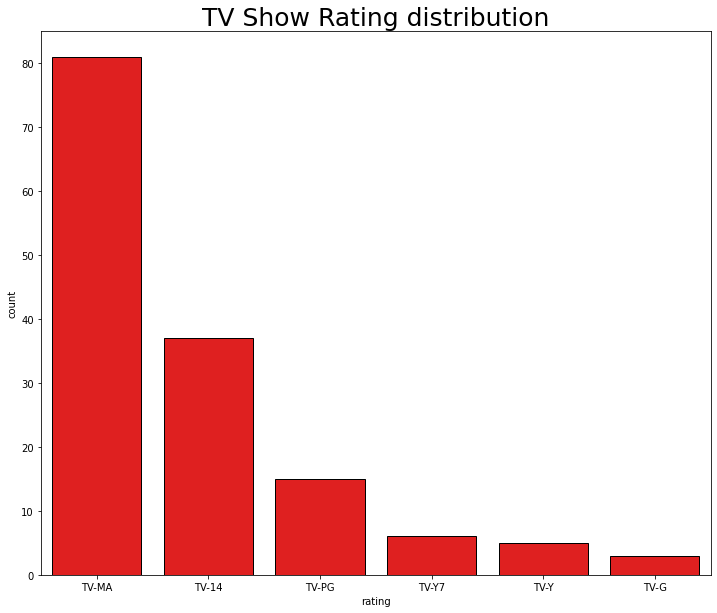

In [27]:
# Ploting TV Show rating
plt.figure(figsize=(12,10))
plt.title('TV Show Rating distribution',fontsize=25)
sns.countplot(x='rating',data=df_tv_show, edgecolor='black', color='red', order = df_tv_show['rating'].value_counts().index[0:10])

#### Insight
There is more TV-MA rating in the TV Show dataset.

<AxesSubplot:title={'center':'Yearly Analysis'}, xlabel='year_add', ylabel='count'>

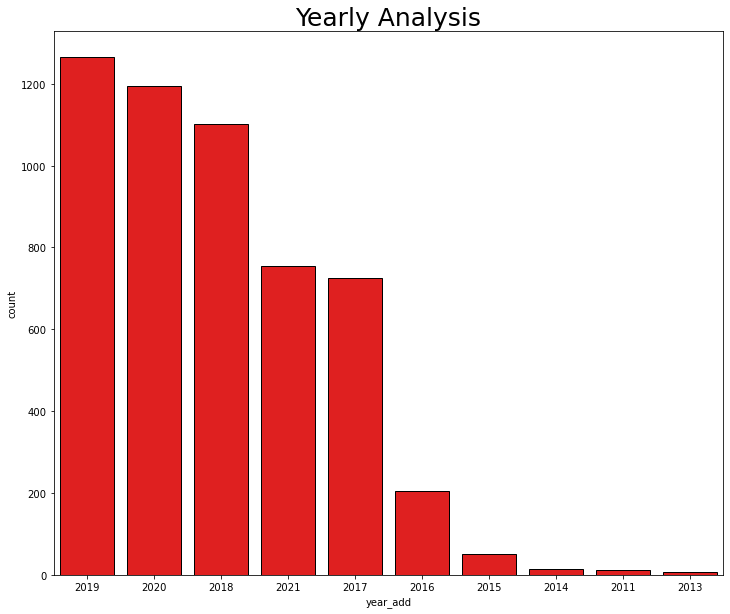

In [28]:
plt.figure(figsize=(12,10))
plt.title('Yearly Analysis', fontsize=25 )
sns.countplot(x='year_add',data=df, edgecolor='black', color='red', order = df['year_add'].value_counts().index[0:10])
#order = df['year_add'].value_counts().index[0:12]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

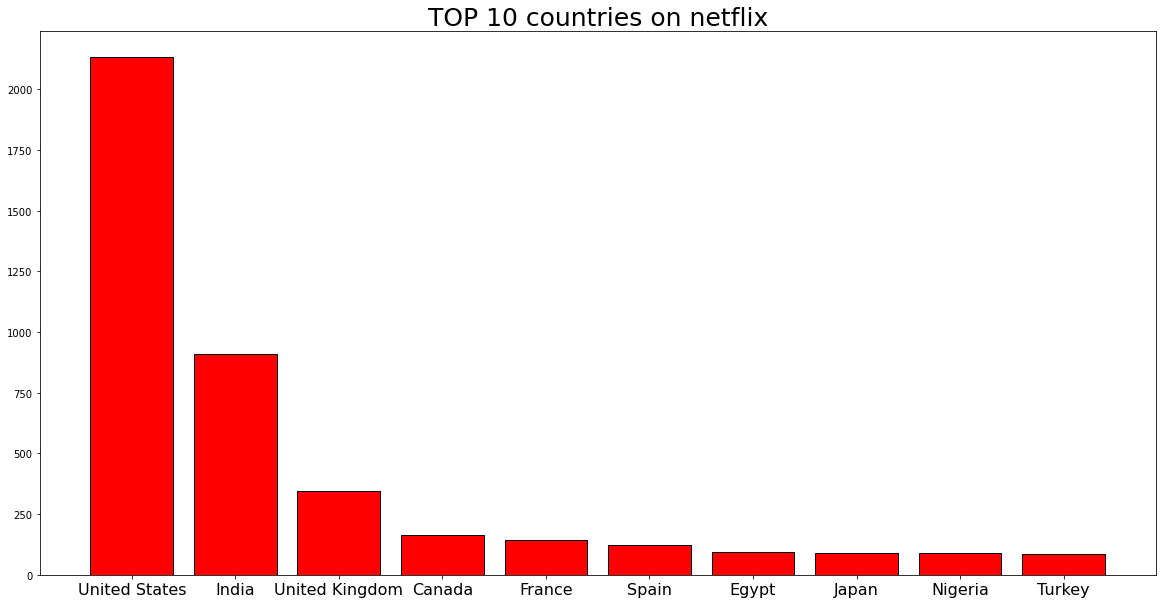

In [29]:
# Plotting top 10 country on the Netflix
df['count'] = 1
top10_countries = df.groupby('country_main')['count'].sum().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(top10_countries.index, top10_countries, edgecolor='black', color='red')
plt.title('TOP 10 countries on netflix', fontsize=25 )
plt.xticks(fontsize=16)

#### Insight

The country that produces more content is the United States, India has the second highest and then the United Kigdom in third.



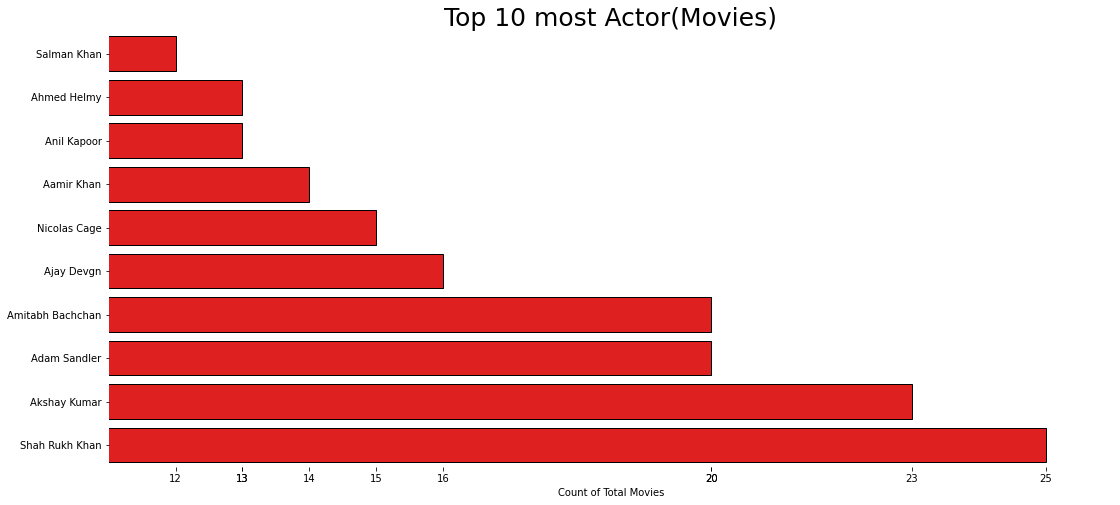

In [30]:
title = 'Top 10 most Actor(Movies)'
_ = plt.figure(figsize=(18,8))
_ = sns.barplot(y=df_movie.cast_main.value_counts()[:10].sort_values().index, x=df_movie.cast_main.value_counts()[:10].sort_values().values,edgecolor='black', color='red');
_ = plt.title(title, color='black', fontsize=25)
_ = plt.box(on=None)
_ = plt.xticks(df_movie.cast_main.value_counts()[:10].sort_values().values);
_ = plt.xlim(min(df_movie.cast_main.value_counts()[:10])-1,max(df_movie.cast_main.value_counts()[:10])+1)
plt.xlabel('Count of Total Movies');


#### Insight

Shah Rukh Khan has act in the most amount of movie compare to other actor. Akshay Kumar is in second position and Adam Sandler and Amitabh Bachchan are sharing the third position.

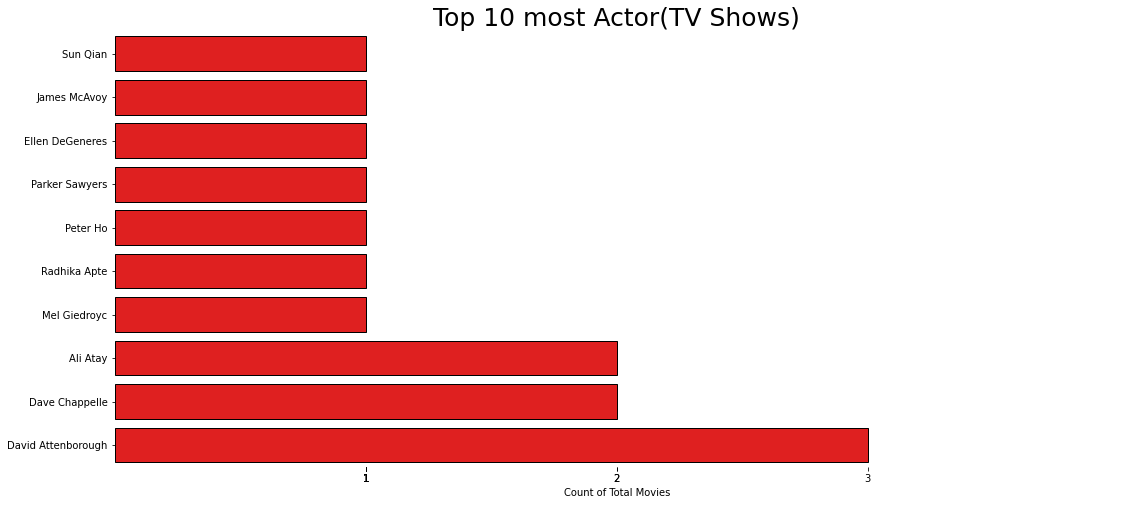

In [31]:
title = 'Top 10 most Actor(TV Shows)'
_ = plt.figure(figsize=(18,8))
_ = sns.barplot(y=df_tv_show.cast_main.value_counts()[:10].sort_values().index, x=df_tv_show.cast_main.value_counts()[:10].sort_values().values,edgecolor='black', color='red');
_ = plt.title(title, color='black', fontsize=25)
_ = plt.box(on=None)
_ = plt.xticks(df_tv_show.cast_main.value_counts()[:10].sort_values().values);
_ = plt.xlim(min(df_tv_show.cast_main.value_counts()[:10])-1,max(df_tv_show.cast_main.value_counts()[:10])+1)
plt.xlabel('Count of Total Movies');

#### Insight

David Attenborough has act in the most amount of Tv Show compare to other actor. Dave Chappelle and Ali Atay are sharing the second position.

### Developing Recommendation Engine using cast, director, country, rating and genres

Well all data required is loaded and cleaned! Next let's get into the recommendation system.

In [32]:
#Developping the recommending Engine using cast, director, country, rating and genres

actors = []

for i in df_movie['cast']:
    actor = re.split(r', \s*', i)
    actors.append(actor)
    
flat_list = []
for sublist in actors:
    for item in sublist:
        flat_list.append(item)
        
actors_list = sorted(set(flat_list))

binary_actors = [[0] * 0 for i in range(len(set(flat_list)))]

for i in df_movie['cast']:
    k = 0
    for j in actors_list:
        if j in i:
            binary_actors[k].append(1.0)
        else:
            binary_actors[k].append(0.0)
        k+=1
        
binary_actors = pd.DataFrame(binary_actors).transpose()
        
directors = []

for i in df_movie['director']:
    if pd.notna(i):
        director = re.split(r', \s*', i)
        directors.append(director)
    
flat_list2 = []
for sublist in directors:
    for item in sublist:
        flat_list2.append(item)
        
directors_list = sorted(set(flat_list2))

binary_directors = [[0] * 0 for i in range(len(set(flat_list2)))]

for i in df_movie['director']:
    k = 0
    for j in directors_list:
        if pd.isna(i):
            binary_directors[k].append(0.0)
        elif j in i:
            binary_directors[k].append(1.0)
        else:
            binary_directors[k].append(0.0)
        k+=1
        
binary_directors = pd.DataFrame(binary_directors).transpose()
        
countries = []

for i in df_movie['country_main']:
    country = re.split(r', \s*', i)
    countries.append(country)
    
flat_list3 = []
for sublist in countries:
    for item in sublist:
        flat_list3.append(item)
        
countries_list = sorted(set(flat_list3))

binary_countries = [[0] * 0 for i in range(len(set(flat_list3)))]

for i in df_movie['country']:
    k = 0
    for j in countries_list:
        if j in i:
            binary_countries[k].append(1.0)
        else:
            binary_countries[k].append(0.0)
        k+=1
        
binary_countries = pd.DataFrame(binary_countries).transpose()

genres = []

for i in df_movie['genre']:
    genre = re.split(r', \s*', i)
    genres.append(genre)
    
flat_list4 = []
for sublist in genres:
    for item in sublist:
        flat_list4.append(item)
        
genres_list = sorted(set(flat_list4))

binary_genres = [[0] * 0 for i in range(len(set(flat_list4)))]

for i in df_movie['genre']:
    k = 0
    for j in genres_list:
        if j in i:
            binary_genres[k].append(1.0)
        else:
            binary_genres[k].append(0.0)
        k+=1
        
binary_genres = pd.DataFrame(binary_genres).transpose()

ratings = []

for i in df_movie['rating']:
    ratings.append(i)

ratings_list = sorted(set(ratings))

binary_ratings = [[0] * 0 for i in range(len(set(ratings_list)))]

for i in df_movie['rating']:
    k = 0
    for j in ratings_list:
        if j in i:
            binary_ratings[k].append(1.0)
        else:
            binary_ratings[k].append(0.0)
        k+=1
        
binary_ratings = pd.DataFrame(binary_ratings).transpose()

In [33]:
binary = pd.concat([binary_actors, binary_directors, binary_countries, binary_genres], axis=1,ignore_index=True)
binary

,0,1,2,3,4,5,6,7,8,9,...,28873,28874,28875,28876,28877,28878,28879,28880,28881,28882
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#creating a fuction to recommand the movie.

def recommender(search):
    cs_list = []
    binary_list = []
    if search in df_movie['title'].values:
        idx = df_movie[df_movie['title'] == search].index.item()
        for i in binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        for j in range(len(df_movie)):
            binary_list2 = []
            for k in binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        movies_copy = df_movie.copy()
        movies_copy['cos_sim'] = cs_list
        results = movies_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    elif search in tv['title'].values:
        idx = tv[tv['title'] == search].index.item()
        for i in binary2.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]
        for j in range(len(tv)):
            binary_list2 = []
            for k in binary2.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        tv_copy = tv.copy()
        tv_copy['cos_sim'] = cs_list
        results = tv_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    else:
        return("Error - Please check spelling.")

In [38]:
recommender('Safe House')

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_add,month_add,country_main,cast_main,cos_sim
136,Movie,Cold Mountain,Anthony Minghella,"Jude Law, Nicole Kidman, Renée Zellweger, Eile...","United States, Italy, Romania, United Kingdom","September 1, 2021",2003,R,154 min,Dramas,This drama follows a wounded Civil War soldier...,2021,September,United States,Jude Law,1.000000
8526,Movie,The Talented Mr. Ripley,Anthony Minghella,"Matt Damon, Gwyneth Paltrow, Jude Law, Cate Bl...",United States,"January 1, 2020",1999,R,139 min,Dramas,A charming sociopath maneuvers into the lush l...,2020,January,United States,Matt Damon,0.375735
3116,Movie,The Two Popes,Fernando Meirelles,"Anthony Hopkins, Jonathan Pryce, Juan Minujín","United Kingdom, Italy","December 20, 2019",2019,PG-13,126 min,Dramas,At a key turning point for the Catholic Church...,2019,December,United Kingdom,Anthony Hopkins,0.342997
3428,Movie,El Camino: A Breaking Bad Movie,Vince Gilligan,Aaron Paul,United States,"October 11, 2019",2019,TV-MA,123 min,Dramas,Fugitive Jesse Pinkman attempts to outrun his ...,2019,October,United States,Aaron Paul,0.325396
5511,Movie,Rodney King,Spike Lee,Roger Guenveur Smith,United States,"April 28, 2017",2017,TV-MA,53 min,Dramas,Roger Guenveur Smith gives voice to the man at...,2017,April,United States,Roger Guenveur Smith,0.325396


In [36]:
recommender('25 Kille')

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_add,month_add,country_main,cast_main,cos_sim
7933,Movie,Santa Claws,Glenn Miller,"Nicola Lambo, Evan Boymel, John P. Fowler, Eri...",United States,"November 17, 2017",2014,TV-PG,86 min,Children & Family Movies,When a gift sack full of kittens gives Santa a...,2017,November,United States,Nicola Lambo,1.000000
1636,Movie,Dance Dreams: Hot Chocolate Nutcracker,Oliver Bokelberg,Debbie Allen,United States,"November 27, 2020",2020,TV-PG,81 min,Children & Family Movies,This documentary spotlights Debbie Allen's car...,2020,November,United States,Debbie Allen,0.516398
5273,Movie,Ghost of the Mountains,Ben Wallis,Antoine Fuqua,United States,"September 13, 2017",2017,G,78 min,Children & Family Movies,An international group of filmmakers sets out ...,2017,September,United States,Antoine Fuqua,0.516398
2778,Movie,Bethany Hamilton: Unstoppable,Aaron Lieber,Bethany Hamilton,United States,"March 25, 2020",2019,PG,100 min,Children & Family Movies,This documentary follows the rising tide of Be...,2020,March,United States,Bethany Hamilton,0.516398
2188,Movie,Sugar High,Ariel Boles,Hunter March,United States,"July 31, 2020",2020,TV-G,44 min,Children & Family Movies,"Talented sugar artists compete for $10,000 ove...",2020,July,United States,Hunter March,0.516398


In [37]:
recommender('A Cinderella Story')

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_add,month_add,country_main,cast_main,cos_sim
298,Movie,Quam's Money,Kayode Kasum,"Falz, Nse Ikpe-Etim, Williams Uchemba, Toni To...",Nigeria,"August 6, 2021",2020,TV-MA,115 min,Comedies,"In this sequel to ""New Money,"" Quam, a securit...",2021,August,Nigeria,Falz,1.000000
374,Movie,Flower Girl,Michelle Bello,"Damilola Adegbite, Chris Attoh, Chuks Chukwuje...",Nigeria,"July 29, 2021",2013,TV-PG,94 min,Comedies,When a young florist who's long dreamed of her...,2021,July,Nigeria,Damilola Adegbite,0.326599
2687,Movie,New Money,Tope Oshin,"Jemima Osunde, Blossom Chukwujekwu, Kate Hensh...",Nigeria,"April 14, 2020",2018,TV-14,107 min,Dramas,An aspiring fashion designer's life is transfo...,2020,April,Nigeria,Jemima Osunde,0.322749
1185,Movie,Who's the Boss,Chinaza Onuzo,"Funke Akindele, Blossom Chukwujekwu, Sharon Oo...",Nigeria,"March 19, 2021",2020,TV-MA,106 min,Comedies,"A young, overworked ad executive with an overb...",2021,March,Nigeria,Funke Akindele,0.298142
7738,Movie,Phone Swap,Kunle Afolayan,"Wale Ojo, Nse Ikpe-Etim, Lydia Forson, Joke Si...",Nigeria,"September 1, 2019",2012,TV-14,112 min,Comedies,A fashion designer and an arrogant businessman...,2019,September,Nigeria,Wale Ojo,0.298142
